# **Probability and Statistics (Week 1)**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```


## **Pre-configurate the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Import Required Datasets and Packages**
**Run the following lines of code**:

In [1]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract




**Do not modify the following**

In [2]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr") %in% loadedNamespaces()))

})

test_that("Test if all utility functions have been loaded", {
  expect_true(exists("skewness"))
  expect_true(exists("kurtosis"))
})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 🎊
Test passed 😀


## **Data Wrangling in R via `dplyr` and `magrittr`**

Data wrangling is the process of cleaning, transforming, and reshaping data for analysis. The `dplyr` package, often used with the pipe operator `%>%` from `magrittr`, provides a set of intuitive functions for these tasks.

### **Can We Do This via Base R?**

Yes, but the syntax tends to be more verbose and less readable. For demonstration, we will load the CSV file `MXB107_2025_ClassInfo.csv`.

In [3]:
MXB107_Info = read.csv("./datasets/MXB107_2025_ClassInfo.csv")
str(MXB107_Info)

'data.frame':	12 obs. of  8 variables:
 $ Class         : chr  "LEC01 01" "LEC01 01" "PRC01 01" "PRC01 01" ...
 $ Type          : chr  "Lecture (Internal)" "Lecture (Online)" "Practical (Online)" "Practical (Internal)" ...
 $ Day           : chr  "Wed" "Wed" "Wed" "Thu" ...
 $ Location      : chr  "GP B117" "Online" "Online" "GP D413" ...
 $ Limit         : int  240 1000 30 35 30 35 25 30 35 35 ...
 $ Teaching_Staff: chr  "Chris Drovandi" "Chris Drovandi" "Narayan Srinivasan" "Narayan Srinivasan" ...
 $ From          : int  11 11 16 16 16 9 14 9 9 11 ...
 $ To            : int  13 13 18 18 18 11 16 11 11 13 ...


We want to extract all classes that start after 9:00 AM on either Thursday or Friday and are not online.

In [4]:
notOnline = MXB107_Info$Location != "Online"
onThursday = MXB107_Info$Day %in% c("Thu", "Fri")
startAfter9AM = MXB107_Info$From > 9
subset(MXB107_Info, notOnline & onThursday & startAfter9AM)

,Class,Type,Day,Location,Limit,Teaching_Staff,From,To
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
4,PRC01 01,Practical (Internal),Thu,GP D413,35,Narayan Srinivasan,16,18
7,PRC01 07,Practical (Internal),Thu,GP S520,25,Ryan Kelly,14,16
10,PRC01 04,Practical (Internal),Fri,GP G216,35,Arwen Nugteren,11,13
11,PRC01 05,Practical (Internal),Fri,GP S502,35,Arwen Nugteren,15,17
12,PRC01 06,Practical (Internal),Fri,GP S519,35,Minh Long Nguyen,15,17


### **Defining a Data-Processing Pipeline**

The `dplyr` and `magrittr` packages simplify and streamline data manipulation by providing a data-processing pipeline.

When we write

```
input %>% do_something_1() %>% do_something_2()
```

The pipe operator %>% takes the output from the expression on the left and passes it as the **first argument** to the function on the right. This allows chaining multiple operations in a clear, readable sequence.


In base R, it would be something like

```
output1 = do_something_1(input)
output2 = do_something_2(output1)
```
Which one looks better to you?




Another great feature of `dplyr` is that it natively understands data frame columns by internally converting data frames into **tibbles** — a more user-friendly data frame format.

This means we don’t need to repeatedly write `MXB107_Info$From` or similar; inside `dplyr` **verbs** like `filter()`, we can simply refer to columns by their names, such as `From` and `To`, which makes the code much cleaner and easier to read.

In [5]:
MXB107_Info %>%
  filter(Location != "Online",
         Day %in% c("Thu", "Fri"),
         From > 9) -> results
print(results)

     Class                 Type Day Location Limit     Teaching_Staff From To
1 PRC01 01 Practical (Internal) Thu  GP D413    35 Narayan Srinivasan   16 18
2 PRC01 07 Practical (Internal) Thu  GP S520    25         Ryan Kelly   14 16
3 PRC01 04 Practical (Internal) Fri  GP G216    35     Arwen Nugteren   11 13
4 PRC01 05 Practical (Internal) Fri  GP S502    35     Arwen Nugteren   15 17
5 PRC01 06 Practical (Internal) Fri  GP S519    35   Minh Long Nguyen   15 17


That indeed looks much better! Here the right-arrow assignment operator really shines.

### **Common `dplyr` Verbs**

#### **filter() — subset rows by condition**

In [6]:
MXB107_Info %>%
  filter(Type == "Lecture (Internal)")

MXB107_Info %>%
  filter(str_detect(Type, "Practical"), #base R: str_detect(MXB107_Info$Type, pattern = "Practical")
         Day == "Wed")

Class,Type,Day,Location,Limit,Teaching_Staff,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13


Class,Type,Day,Location,Limit,Teaching_Staff,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18


#### **select() — pick specific columns**

In [7]:
MXB107_Info %>%
  filter(Teaching_Staff == "Chris Drovandi") %>%
  select(Class, Teaching_Staff, Day, Location, From, To)

Class,Teaching_Staff,Day,Location,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<int>
LEC01 01,Chris Drovandi,Wed,GP B117,11,13
LEC01 01,Chris Drovandi,Wed,Online,11,13


#### **mutate() — add or modify columns**

In [8]:
MXB107_Info %>%
  mutate(Duration = To-From) %>%
  filter(Day == "Wed")

Class,Type,Day,Location,Limit,Teaching_Staff,From,To,Duration
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>
LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13,2
LEC01 01,Lecture (Online),Wed,Online,1000,Chris Drovandi,11,13,2
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18,2


#### **arrange() — reorder rows by column(s)**

In [9]:
MXB107_Info %>%
  filter(Day == "Wed") %>%
  arrange(Limit) #Ascending order

Class,Type,Day,Location,Limit,Teaching_Staff,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18
LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13
LEC01 01,Lecture (Online),Wed,Online,1000,Chris Drovandi,11,13


#### **group_by() and summarise() — group data and aggregate**

In [10]:
MXB107_Info %>%
  group_by(Day) %>%
  summarise(totalLimit = sum(Limit),
            averageLimit = mean(Limit),
            Count = n()) #This creates a new `tibble` storing summarised results


Day,totalLimit,averageLimit,Count
<chr>,<int>,<dbl>,<int>
Fri,140,35.0000,4
Thu,155,31.0000,5
Wed,1270,423.3333,3


#### **rename() — rename columns**

In [11]:
MXB107_Info %>%
  rename(Start = From, End = To) %>%
  head(3)

,Class,Type,Day,Location,Limit,Teaching_Staff,Start,End
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
1,LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13
2,LEC01 01,Lecture (Online),Wed,Online,1000,Chris Drovandi,11,13
3,PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18


#### **slice() — select rows by position**

In [12]:
MXB107_Info %>%
  slice(1:3) #Similar to indexing

Class,Type,Day,Location,Limit,Teaching_Staff,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13
LEC01 01,Lecture (Online),Wed,Online,1000,Chris Drovandi,11,13
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18


#### **distinct() — get unique rows by columns**


In [13]:
MXB107_Info %>%
  select(Teaching_Staff, Type, Day, From, To) %>%
  distinct(Teaching_Staff)

Teaching_Staff
<chr>
Chris Drovandi
Narayan Srinivasan
Oliver Vu
Minh Long Nguyen
Ryan Kelly
Nicholas Gecks-Preston
Arwen Nugteren


#### **pivot_longer() - reshapes wide-format data into long format**

We are often more familiar with wide-format data, where each row represents an observation and each column represents a variable or feature.

However, in many situations — particularly for modeling, statistical analysis, and plotting — it is more convenient or even required to work with data in long format. In long format, each row corresponds to a single measurement or value, along with its associated identifiers.

For example, this data frame is in wide-format.

In [14]:
MXB107_Info %>%
  select(Class, Teaching_Staff, From, To) %>%
  head(3) %>%
  mutate(id = row_number())

,Class,Teaching_Staff,From,To,id
,<chr>,<chr>,<int>,<int>,<int>
1,LEC01 01,Chris Drovandi,11,13,1
2,LEC01 01,Chris Drovandi,11,13,2
3,PRC01 01,Narayan Srinivasan,16,18,3


To convert this to long-format, we can use `pivot_longer()`:

In [15]:
MXB107_Info %>%
  select(Class, Teaching_Staff, From, To) %>%
  head(3) %>%
  mutate(id = row_number()) %>%
  pivot_longer(
    cols = c(From, To),
    names_to = "timeType",
    values_to = "Hour"
  )

Class,Teaching_Staff,id,timeType,Hour
<chr>,<chr>,<int>,<chr>,<int>
LEC01 01,Chris Drovandi,1,From,11
LEC01 01,Chris Drovandi,1,To,13
LEC01 01,Chris Drovandi,2,From,11
LEC01 01,Chris Drovandi,2,To,13
PRC01 01,Narayan Srinivasan,3,From,16
PRC01 01,Narayan Srinivasan,3,To,18


We observe that the number of rows has doubled. This is because the original `From` and `To` columns have been reshaped into a single column called `Hour`, with a corresponding column `timeType` indicating whether the value refers to the start or end time.

Instead of storing both `From` and `To` in the same row, each is now represented as a separate row — one for the start time and one for the end time. This structure is characteristic of long format data. If you are familiar with databases, now `<id, timeType>` becomes the new `key` (identifier).

Long-format data frames are less memory-efficient but more convenient for modeling, statistical analysis, and data visualisation. The next one is a *silly* toy example.

In [16]:
MXB107_Info %>%
  select(Class, Teaching_Staff, From, To) %>%
  head(3) %>%
  mutate(id = row_number()) %>%
  pivot_longer(
    cols = c(From, To),
    names_to = "timeType",
    values_to = "Hour"
  )  %>%
  group_by(timeType) %>% #Now it's possible to group_by `timeType` and compute `earliest` and `latest` hours for each.
  summarise(earliest = min(Hour),
            latest = max(Hour))


timeType,earliest,latest
<chr>,<int>,<int>
From,11,16
To,13,18


## **Data Visualisation via `ggplot2'**

`ggplot2` is a powerful and widely-used R package for data visualisation based on the "Grammar of Graphics" concept. It allows you to create complex and elegant plots by layering components step-by-step.

Key features of `ggplot2`:

- **Layered approach**: Build plots by adding layers like stacking LEGO blocks.
- **Consistent syntax**: Uses a clear, declarative style making plots easy to read and modify.
- **Highly customisable**: Control every detail of your plot’s appearance.
- **Works well with "tidy" data**: Designed to work seamlessly with data in long format.

To demonstrate the use of `ggplot2`, we will use a new dataset named `iris`, a classic dataset containing measurements of `Sepal.Length`, `Sepal.Width`, `Petal.Length`, and `Petal.Width` for three `Species` of iris flowers.

In [17]:
iris = read.csv("./datasets/iris.csv")
iris %>% head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### **Stacking LEGO Blocks**

Think of building a plot in `ggplot2` like stacking LEGO blocks, where each block adds something new.


#### **First LEGO Block: Data**

`iris %>% ggplot()` tells `ggplot2` that we will use data from `iris`.

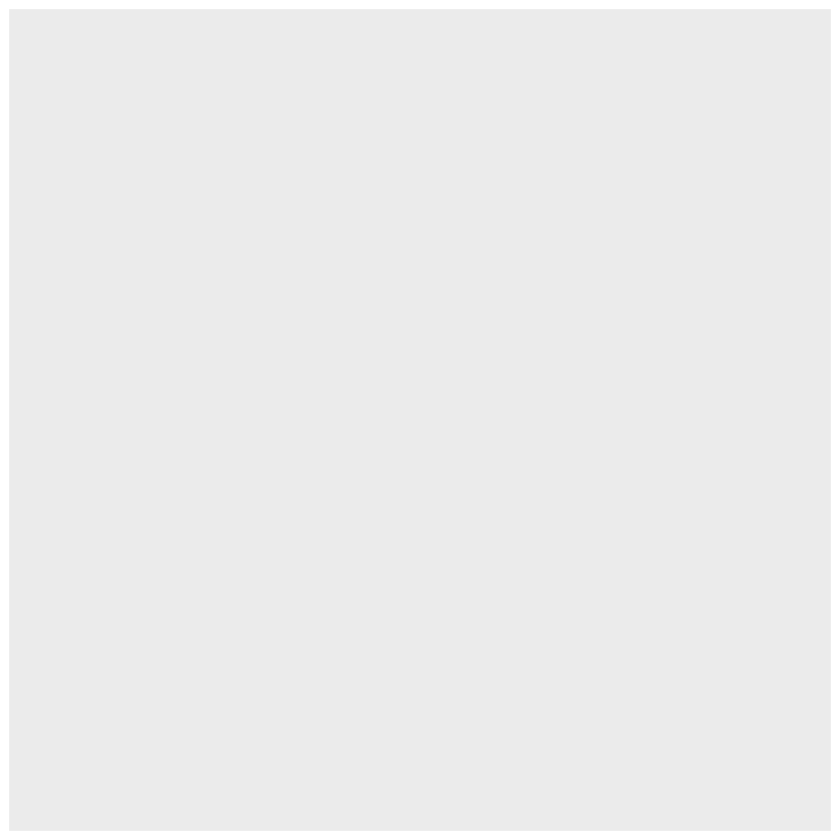

In [25]:
iris %>%
  ggplot()

Alternatively, you can write this explicitly as:

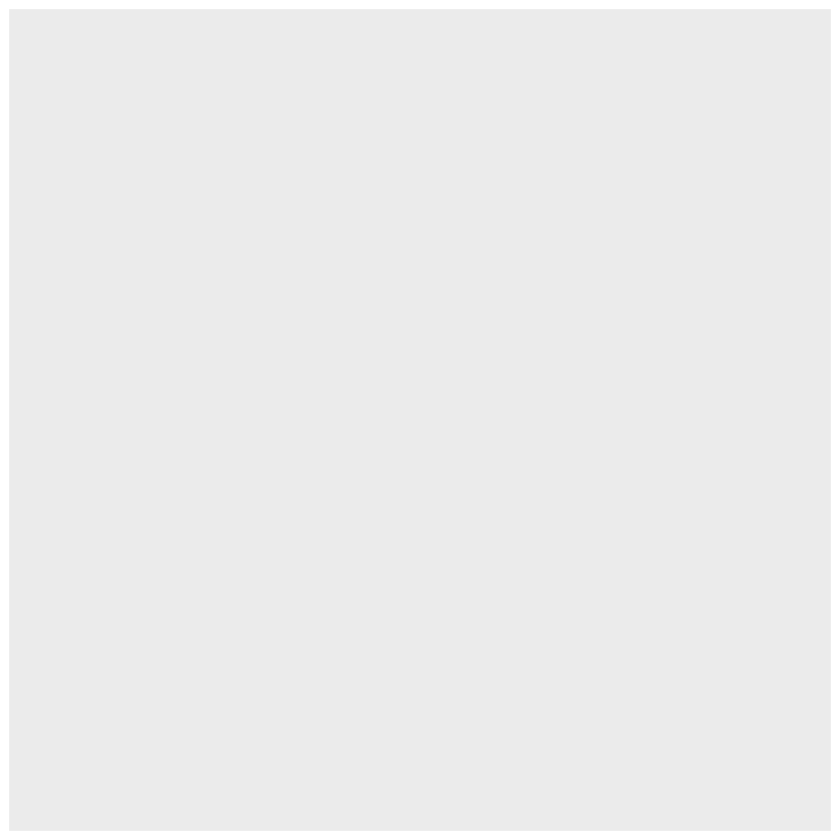

In [24]:
ggplot(data = iris)

#### **Second LEGO Block: Aesthetics**

The aesthetics block `aes()` is like setting up the grid and rules of your LEGO baseplate — it defines how data variables map to visual properties on the plot.

For example:
- `x = Sepal.Width` defines what data goes along the horizontal axis (x-axis).
- `y = Petal.Length` defines what data goes along the vertical axis (y-axis).
- `color = Species` decides how points are colored based on their group.

Yes, `ggplot2` natively understand column names. In fact, `ggplot2` and `dplyr` belong to a bigger family called `tidyverse`.

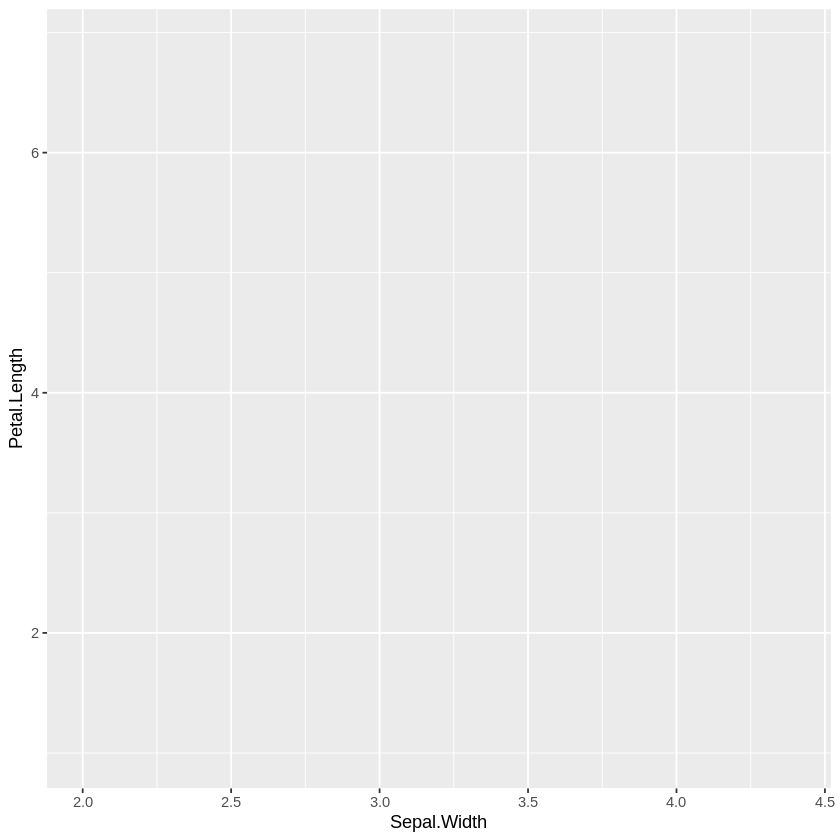

In [26]:
iris %>%
  ggplot(aes(x = Sepal.Width, y = Petal.Length, color = Species))

#### **Third LEGO Block: The Actual Plot**

The third block defines the type of plot or visual representation you want — this is called a `geom` (geometric object). It tells `ggplot2` how to draw your data on the axes set up by the aesthetics.

Examples of `geom` include:
- `geom_point()` for scatter-plots
- `geom_line()` for line plots
- `geom_bar()` for bar charts
- `geom_histogram()` for histograms
and many more

Without adding a geom, your plot has no visual marks — just empty axes.

From now, we use the `+` operator in `ggplot2` to add layers onto our plot one by one.

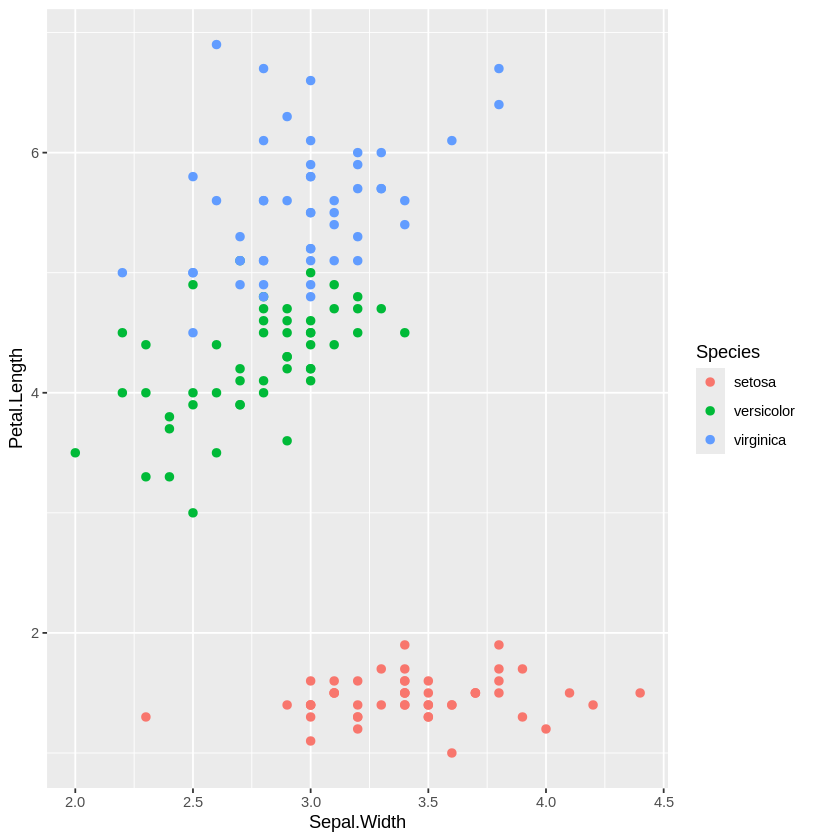

In [28]:
iris %>%
  ggplot(aes(x = Sepal.Width, y = Petal.Length, color = Species)) +
  geom_point(size = 3)

#### **Fourth Block: Customisation**

The fourth block in `ggplot2` is all about customizing the appearance and style of your plot.

This includes things like:

- Adding titles, axis labels, and captions using `labs()`
- Changing the theme (background, grid lines, fonts) with functions like `theme_minimal()`, `theme_classic()`, or customising with `theme()`
- Adjusting scales for axes, colors, and sizes (e.g., `scale_color_manual()`, `scale_x_continuous()`)
- Adding facets to create small multiples (`facet_wrap()`, `facet_grid()`)

This block is like painting and decorating your LEGO model — after you’ve built the structure, you choose colors, textures, and details to make it look exactly how you want.

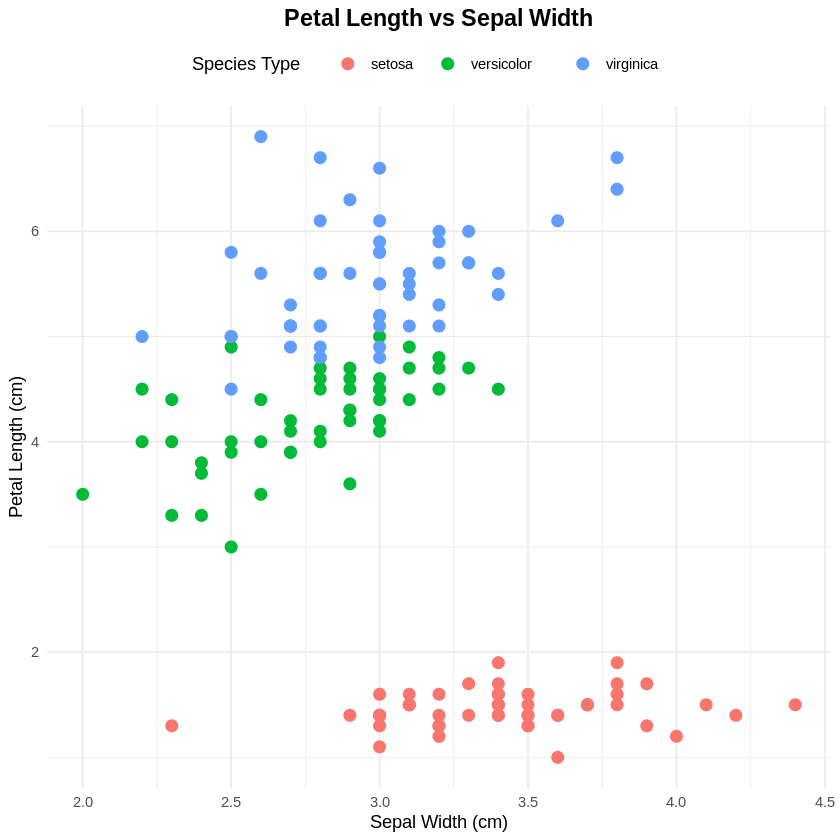

In [34]:
iris %>%
  ggplot(aes(x = Sepal.Width, y = Petal.Length, color = Species)) +
  geom_point(size = 3) +
  labs(
    title = "Petal Length vs Sepal Width",
    x = "Sepal Width (cm)",
    y = "Petal Length (cm)",
    color = "Species Type"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    legend.position = "top"
  )
